# Steps
**1. Importing the Data**

**2. Exploratory Data Analysis**
- `Survived`
- `Pclass`
- `Name`
- `Sex`
- `Age`
- `SibSp`
- `Parch`
- `Ticket`
- `Fare`
- `Cabin`
- `Embarked`
- Passenger `Fare` - `Cabin` name correlation
- Which `Cabin` died most?
- `Cabin` vs `Passenger` Class
- `PClass` vs `Cabin`
- `Fare` Distribution of Titanic Dataset
- `Pclass` - `Age` Comparison

**3. Data Engineering**
- Fill null values in `Age` and `Fare` 
- Create Another Column for Family Member Number
- Add a new column to dataset as a `Title`
- Encoding

**4. Training and Evaluating ML Algorithms**
- `SGDClassifier`
- `RandomForestClassifier`
- `DecisionTreeClassifier`
- `XGBoost`
- `Artificial Neural Networks`
- Comparison of Models

**5. Find Predictions on Real Test Set**

----------------------------------------------------

## 1. Importing the Data

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
gender_sub = pd.read_csv("data/gender_submission.csv")

In [108]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


----------------------------------------------------

## 2. Exploratory Data Analysis

### `Survived`

In [5]:
train.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

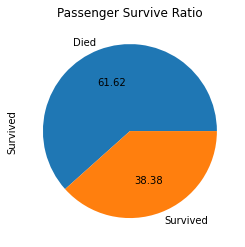

In [6]:
train.Survived.value_counts().plot(kind="pie",
                                  labels = ["Died", "Survived"],
                                  title = "Passenger Survive Ratio",
                                  autopct='%.2f')
plt.show();

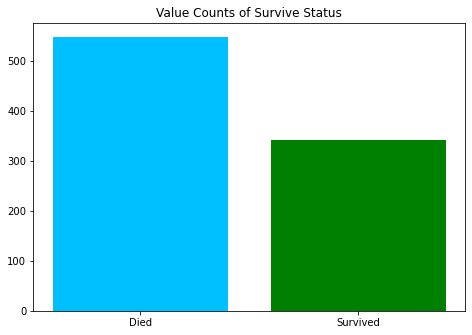

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Died', 'Survived']
total_person = train.Survived.value_counts()
ax.bar(status,total_person, color = ["deepskyblue", "green"])
plt.title("Value Counts of Survive Status")
plt.show();

### `Pclass`

In [8]:
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [9]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

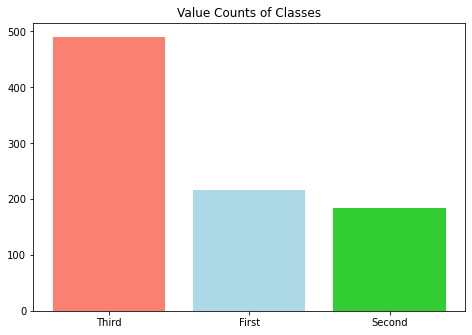

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = ['Third', 'First', 'Second']
total_person = train.Pclass.value_counts()
ax.bar(classes,total_person, color = ["salmon", "lightblue", "limegreen"])
plt.title("Value Counts of Classes")
plt.show()

In [11]:
cross_tab_class = pd.crosstab(train["Survived"], train["Pclass"]).T
cross_tab_class[0]

Pclass
1     80
2     97
3    372
Name: 0, dtype: int64

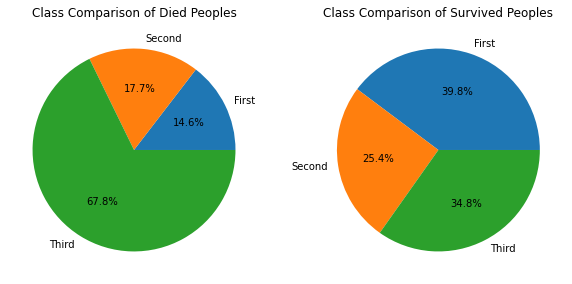

In [12]:
labels = ["First", "Second", "Third"]
fig1, axes = plt.subplots(1, 2)
axes[0].pie(cross_tab_class[0], labels=labels, autopct='%1.1f%%')
axes[1].pie(cross_tab_class[1], labels=labels, autopct='%1.1f%%')

axes[0].set_title("Class Comparison of Died Peoples")
axes[1].set_title("Class Comparison of Survived Peoples")
fig1.set_figheight(10)
fig1.set_figwidth(10)
plt.show()

### `Name`

In [13]:
train.Name.describe()

count                            891
unique                           891
top       Strom, Miss. Telma Matilda
freq                               1
Name: Name, dtype: object

In [14]:
names = train.Name.to_frame()
names

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [15]:
# Extracting the last names from Name column
last_names = [name.split(",", 1)[0] for name in names.Name]
pd.Series(last_names).value_counts()  

Andersson     9
Sage          7
Carter        6
Goodwin       6
Skoog         6
             ..
Chaffee       1
Rush          1
Ringhini      1
Masselmani    1
Drew          1
Length: 667, dtype: int64

In [16]:
# Extracting the titles from Name column
titles = [name[name.find(',')+2:name.find('.')] for name in names.Name]
pd.Series(titles)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Length: 891, dtype: object

In [17]:
pd.Series(titles).value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Capt              1
Sir               1
Don               1
Lady              1
Mme               1
the Countess      1
Jonkheer          1
Ms                1
dtype: int64

### `Sex`

In [18]:
train.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [19]:
train.Sex.value_counts().to_frame()

,Sex
male,577
female,314


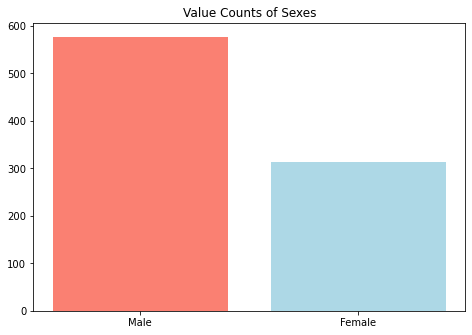

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Male', 'Female']
total_person = train.Sex.value_counts()
ax.bar(status,total_person, color = ["salmon", "lightblue"])
plt.title("Value Counts of Sexes")
plt.show()

In [21]:
cross_tab_sex = pd.crosstab(train["Survived"], train["Sex"]).T
cross_tab_sex[0]

Sex
female     81
male      468
Name: 0, dtype: int64

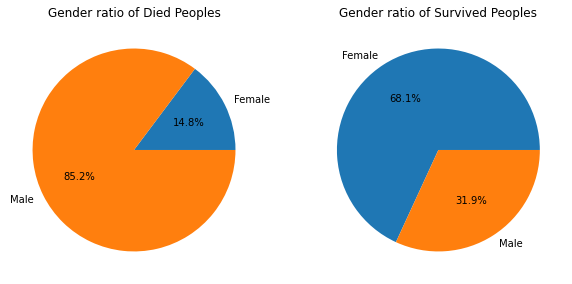

In [22]:
labels = ["Female", "Male"]
fig1, axes = plt.subplots(1, 2)
axes[0].pie(cross_tab_sex[0], labels = labels,  autopct='%1.1f%%')
axes[1].pie(cross_tab_sex[1], labels = labels,  autopct='%1.1f%%')
axes[0].set_title('Gender ratio of Died Peoples')
axes[1].set_title('Gender ratio of Survived Peoples')
fig1.set_figheight(10)
fig1.set_figwidth(10)
plt.show()

### `Age`

In [23]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

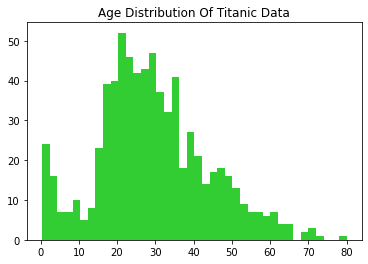

In [24]:
train["Age"].hist(bins=40, grid=False, color="limegreen");
plt.title("Age Distribution Of Titanic Data");

In [25]:
died_people_mean = train.Age[train["Survived"] == 0].mean()
survived_people_mean = train.Age[train["Survived"] == 1].mean()
print(f"Died people mean age is {died_people_mean:.2f}. \nSurvived people mean age {survived_people_mean:.2f}.")

Died people mean age is 30.63. 
Survived people mean age 28.34.


### `SibSp`

In [26]:
train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [27]:
sib_sp_unique_numbers = train.SibSp.unique()
sib_sp_unique_numbers.sort()
sib_sp_unique_numbers

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [28]:
cross_tab_sibsp = pd.crosstab(train["Survived"], train["SibSp"]).T
cross_tab_sibsp

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


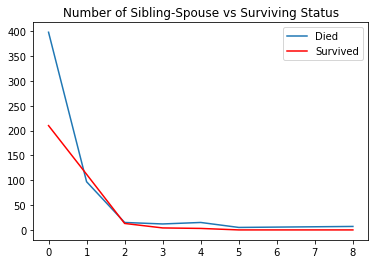

In [29]:
# Number of Sibling-Spouse vs surviving status.

died_people_by_sibsp = cross_tab_sibsp[0]
survived_people_by_sibsp = cross_tab_sibsp[1]

plt.plot(died_people_by_sibsp, label = "Died")
plt.plot(survived_people_by_sibsp, color = 'r', label = "Survived");
plt.title("Number of Sibling-Spouse vs Surviving Status")
plt.legend();

### `Parch`

In [30]:
train.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [31]:
parch_unique_numbers = train.Parch.unique()
parch_unique_numbers.sort()
parch_unique_numbers

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [32]:
cross_tab_parch = pd.crosstab(train["Survived"], train["Parch"]).T
cross_tab_parch

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


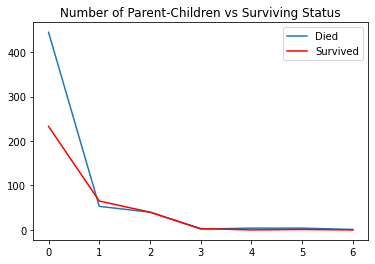

In [33]:
# Number of Parent-Children vs surviving status.

died_people_by_parch = cross_tab_parch[0]
survived_people_by_parch = cross_tab_parch[1]

plt.plot(died_people_by_parch, label = "Died")
plt.plot(survived_people_by_parch, color = 'r', label = "Survived");
plt.title("Number of Parent-Children vs Surviving Status")
plt.legend();

### `Ticket`

In [34]:
train.Ticket.describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [35]:
train.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

### `Fare`

In [36]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [37]:
train.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

### `Cabin`

In [38]:
train.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [39]:
train.Cabin.isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

### `Embarked`

In [40]:
train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [41]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [42]:
train.Embarked.isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

### Passenger `Fare` - `Cabin` name correlation

In [43]:
fare_cabin = train[["Fare", "Cabin"]]
fare_cabin = fare_cabin.dropna()
fare_cabin = fare_cabin.reset_index()
fare_cabin.drop(["index"], axis = 1, inplace = True)
fare_cabin

,Fare,Cabin
0,71.2833,C85
1,53.1000,C123
2,51.8625,E46
3,16.7000,G6
4,26.5500,C103
...,...,...
199,52.5542,D35
200,5.0000,B51 B53 B55
201,83.1583,C50
202,30.0000,B42


In [44]:
# Simplfying the data
only_cabin_name = [i[0] for i in fare_cabin.Cabin]
only_cabin_name_df = pd.DataFrame(only_cabin_name)
fare_cabin.Cabin = only_cabin_name_df
fare_cabin

,Fare,Cabin
0,71.2833,C
1,53.1000,C
2,51.8625,E
3,16.7000,G
4,26.5500,C
...,...,...
199,52.5542,D
200,5.0000,B
201,83.1583,C
202,30.0000,B


In [45]:
fare_cabin.Cabin.describe()

count     204
unique      8
top         C
freq       59
Name: Cabin, dtype: object

In [46]:
cabin_labels = fare_cabin.Cabin.unique()
cabin_labels

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [47]:
# Finding unit fare for each label.
fare_sums = [fare_cabin[fare_cabin["Cabin"] == i]["Fare"].sum() for i in cabin_labels]


label_lens = [len(fare_cabin[fare_cabin["Cabin"] == i]) for i in cabin_labels]


unit_fare_by_labels = np.divide(fare_sums, label_lens)
unit_fare_by_labels

array([100.15134068,  46.02669375,  13.58125   ,  57.24457576,
        39.62388667, 113.50576383,  18.69679231,  35.5       ])

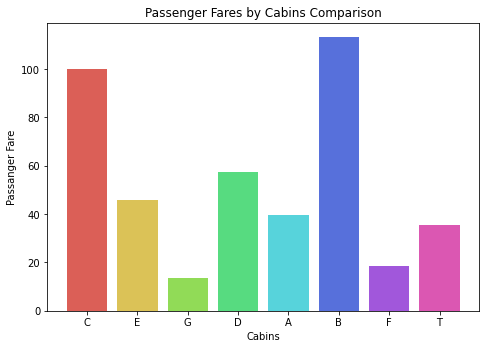

In [48]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cabin_labels, unit_fare_by_labels, color=sns.color_palette("hls", 8))
plt.xlabel("Cabins")
plt.ylabel("Passanger Fare")
plt.title("Passenger Fares by Cabins Comparison")
plt.show()

### Which `Cabin` died most?

In [49]:
survived_cabin = train[["Survived", "Cabin"]]
survived_cabin = survived_cabin.dropna()
survived_cabin = survived_cabin.reset_index()
survived_cabin.drop(["index"], axis = 1, inplace = True)
survived_cabin

,Survived,Cabin
0,1,C85
1,1,C123
2,0,E46
3,1,G6
4,1,C103
...,...,...
199,1,D35
200,0,B51 B53 B55
201,1,C50
202,1,B42


In [50]:
# Simplfying the data
only_cabin_name = [i[0] for i in survived_cabin.Cabin]
only_cabin_name_df = pd.DataFrame(only_cabin_name)
survived_cabin.Cabin = only_cabin_name_df
survived_cabin

,Survived,Cabin
0,1,C
1,1,C
2,0,E
3,1,G
4,1,C
...,...,...
199,1,D
200,0,B
201,1,C
202,1,B


In [51]:
cabin_labels = survived_cabin.Cabin.unique()
cabin_labels

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [52]:
# Finding the survive ratio for each cabins
survived_sums = [survived_cabin[survived_cabin.Cabin == i].Survived.sum() for i in cabin_labels]

cabin_numbers = [len(survived_cabin[survived_cabin.Cabin == i]) for i in cabin_labels]

survive_ratio_by_cabins = np.divide(survived_sums, cabin_numbers)
survive_ratio_by_cabins

array([0.59322034, 0.75      , 0.5       , 0.75757576, 0.46666667,
       0.74468085, 0.61538462, 0.        ])

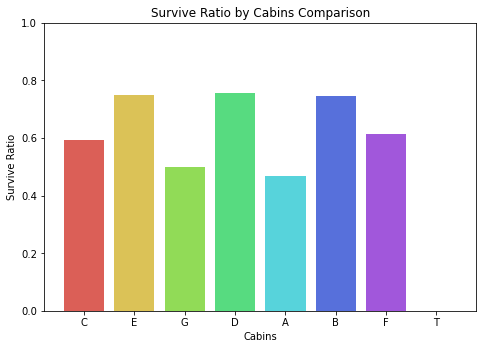

In [53]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cabin_labels, survive_ratio_by_cabins, color=sns.color_palette("hls", 8))
plt.xlabel("Cabins")
plt.ylabel("Survive Ratio")
plt.title("Survive Ratio by Cabins Comparison")
plt.ylim(0, 1)
plt.show()

### `Cabin` vs `Passenger` Class

In [54]:
class_cabin = train[["Pclass", "Cabin"]]
class_cabin = class_cabin.dropna()
class_cabin = class_cabin.reset_index()
class_cabin.drop(["index"], axis = 1, inplace = True)
class_cabin

,Pclass,Cabin
0,1,C85
1,1,C123
2,1,E46
3,3,G6
4,1,C103
...,...,...
199,1,D35
200,1,B51 B53 B55
201,1,C50
202,1,B42


In [55]:
# Simplfying the data
only_cabin_name = [i[0] for i in survived_cabin.Cabin]
only_cabin_name_df = pd.DataFrame(only_cabin_name)
class_cabin.Cabin = only_cabin_name_df
class_cabin

,Pclass,Cabin
0,1,C
1,1,C
2,1,E
3,3,G
4,1,C
...,...,...
199,1,D
200,1,B
201,1,C
202,1,B


In [56]:
str_class = []
for i in class_cabin.Pclass:
    if i == 1:
        str_class.append("First")
    if i == 2:
        str_class.append("Second")
    if i == 3:
        str_class.append("Third")

class_cabin.Pclass = str_class

In [57]:
class_counts = [class_cabin[class_cabin.Cabin == i].value_counts().to_frame().reset_index().rename(columns={0 : "Counts"}) for i in cabin_labels]

In [58]:
class_counts[0].Cabin

0    C
Name: Cabin, dtype: object

In [59]:
class_counts[0].drop(["Cabin"], axis=1)

,Pclass,Counts
0,First,59


In [60]:
class_counts[3].drop(["Cabin"], axis=1).Counts.sum()

33

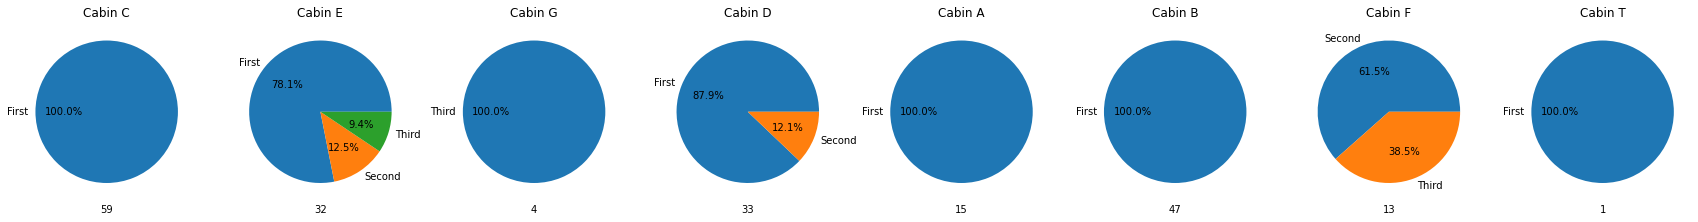

In [61]:
fig1, axes = plt.subplots(1,8)
for i in range(len(cabin_labels)):
    axes[i].pie(class_counts[i].drop(["Cabin"], axis=1).Counts, labels=class_counts[i].Pclass, autopct='%1.1f%%')
    axes[i].set_title("Cabin " + class_counts[i].Cabin[0])
    axes[i].set_xlabel(class_counts[i].drop(["Cabin"], axis=1).Counts.sum())
    
fig1.set_figheight(40)
fig1.set_figwidth(30)
plt.show()

### `PClass` vs `Cabin`

In [62]:
class_cabin

,Pclass,Cabin
0,First,C
1,First,C
2,First,E
3,Third,G
4,First,C
...,...,...
199,First,D
200,First,B
201,First,C
202,First,B


In [63]:
class_labels = class_cabin.Pclass.unique()

In [64]:
class_cabin_value_counts = [class_cabin[class_cabin.Pclass == i ].value_counts().reset_index().rename(columns={0 : "Count"}) for i in class_labels]

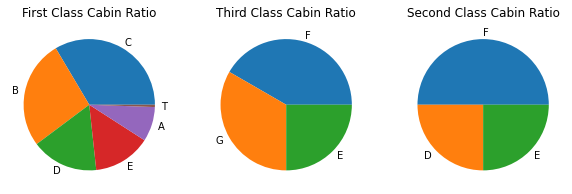

In [65]:
fig1, axes = plt.subplots(1, 3)
for i in range(len(class_labels)):
    axes[i].pie(class_cabin_value_counts[i].Count , labels= class_cabin_value_counts[i].Cabin)
    axes[i].set_title(f"{class_labels[i]} Class Cabin Ratio")
fig1.set_figheight(10)
fig1.set_figwidth(10)
plt.show()

### `Fare` Distribution of Titanic Dataset

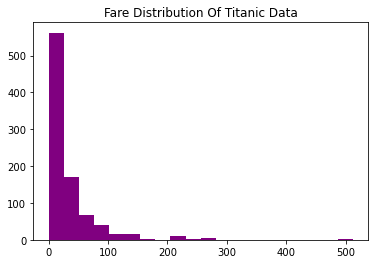

In [66]:
train["Fare"].hist(bins=20, grid=False, color="purple");
plt.title("Fare Distribution Of Titanic Data");

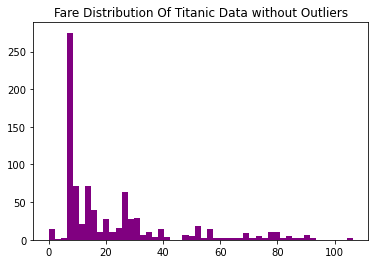

In [67]:
# Fare Distribution with z_score < 1.5

from scipy import stats
z_scores = stats.zscore(train.Fare)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 1.5)
new_fare = train.Fare[filtered_entries]

new_fare.hist(bins=50, grid=False, color="purple");
plt.title("Fare Distribution Of Titanic Data without Outliers");

### `Pclass` - `Age` Comparison

In [68]:
class_age = train[["Pclass", "Age"]].dropna()
class_age

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
885,3,39.0
886,2,27.0
887,1,19.0
889,1,26.0


In [69]:
labels = class_age.Pclass.unique()

class_age = [class_age[class_age["Pclass"] == i] for i in labels]

medians = [class_age[i].Age.median() for i in range(len(labels))]

median_dict = {w:m for w, m in zip(labels, medians)}
median_dict

{3: 24.0, 1: 37.0, 2: 29.0}

In [70]:
print(f"Third class age median: {str(medians[0])}\nFirst class age median: {str(medians[1])}\nSecond class age median: {str(medians[2])}")

Third class age median: 24.0
First class age median: 37.0
Second class age median: 29.0


----------------------------------------------------

## 3. Data Engineering

In [71]:
# Seperate the target and train data
target = train.Survived
train.drop(["Survived"], axis = 1, inplace = True)

In [72]:
# Append train and test data for data engineering.
train_test = train.append(test, ignore_index=True)
train_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Fill null values in `Age` and `Fare` 

In [73]:
train_test.Fare.isnull().sum()

1

In [74]:
# Since there is only one null value in Fare, I will just fill it with median
train_test["Fare"].fillna((train_test["Fare"].median()), inplace=True)

In [75]:
train_test.Age.isnull().sum()

263

In [76]:
# There is strong correlation between `Age` and `Pclass`, 
# so I will fill the null values according to the medians of `Age` according to `Pclass`

median_dict

{3: 24.0, 1: 37.0, 2: 29.0}

In [77]:
class_age = train_test[["Pclass", "Age"]]
class_age

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
1304,3,NaN
1305,1,39.0
1306,3,38.5
1307,3,NaN


In [78]:
class_age['Age'] = class_age.apply(lambda row: median_dict[row["Pclass"]] if np.isnan(row['Age']) else row['Age'], axis=1)

<ipython-input-78-815a4e16dec5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_age['Age'] = class_age.apply(lambda row: median_dict[row["Pclass"]] if np.isnan(row['Age']) else row['Age'], axis=1)


In [79]:
class_age.isnull().sum()

Pclass    0
Age       0
dtype: int64

In [80]:
train_test.Age = class_age.Age
train_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Create Another Column for Family Member Number

In [81]:
train_test["Family"] = train_test.SibSp + train_test.Parch
train_test.drop(["SibSp", "Parch"], axis = 1, inplace = True)
train_test

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,A.5. 3236,8.0500,NaN,S,0
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,PC 17758,108.9000,C105,C,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,1308,3,"Ware, Mr. Frederick",male,24.0,359309,8.0500,NaN,S,0


### Add a new column to dataset as a Title

In [82]:
names = train_test.Name.to_frame()
titles = [name[name.find(',')+2:name.find('.')] for name in names.Name]
pd.Series(titles)

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Length: 1309, dtype: object

In [83]:
train_test["Title"] = titles

In [84]:
train_test.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Ms                2
Mlle              2
Capt              1
the Countess      1
Sir               1
Don               1
Lady              1
Mme               1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [85]:
# Since there is so much title, 
# I changed the title names which has no more than 4 values.
titles_df = train_test.Title.to_frame()
new_title = titles_df.where(titles_df.apply(lambda x: x.map(x.value_counts()))>= 5, "Other")
new_title.value_counts()

Title 
Mr        757
Miss      260
Mrs       197
Master     61
Other      18
Dr          8
Rev         8
dtype: int64

In [86]:
# Change existing title column with new ones.
train_test.Title = new_title
train_test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,Mr


### Dropping Unnecessary Features

In [87]:
train_test.drop(["Name", "Ticket", "Cabin", "PassengerId", "Embarked"], axis = 1, inplace = True)
train_test

,Pclass,Sex,Age,Fare,Family,Title
0,3,male,22.0,7.2500,1,Mr
1,1,female,38.0,71.2833,1,Mrs
2,3,female,26.0,7.9250,0,Miss
3,1,female,35.0,53.1000,1,Mrs
4,3,male,35.0,8.0500,0,Mr
...,...,...,...,...,...,...
1304,3,male,24.0,8.0500,0,Mr
1305,1,female,39.0,108.9000,0,Other
1306,3,male,38.5,7.2500,0,Mr
1307,3,male,24.0,8.0500,0,Mr


### Encoding

In [88]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Label encoding for Title and Sex feature.
train_test["Title"] = labelencoder.fit_transform(train_test["Title"])

train_test["Sex"] = labelencoder.fit_transform(train_test["Sex"])

# One hot encoding for Pclass feature
train_test = pd.get_dummies(train_test, columns = ['Pclass'])

train_test

,Sex,Age,Fare,Family,Title,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,7.2500,1,3,0,0,1
1,0,38.0,71.2833,1,4,1,0,0
2,0,26.0,7.9250,0,2,0,0,1
3,0,35.0,53.1000,1,4,1,0,0
4,1,35.0,8.0500,0,3,0,0,1
...,...,...,...,...,...,...,...,...
1304,1,24.0,8.0500,0,3,0,0,1
1305,0,39.0,108.9000,0,5,1,0,0
1306,1,38.5,7.2500,0,3,0,0,1
1307,1,24.0,8.0500,0,3,0,0,1


----------------------------------------------------

## 4. Training and Evaluating ML Algorithms

In [89]:
# Seperate the previously appended train_test dataset
train = train_test.iloc[:891]
test = train_test.iloc[891:]

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, train_size=0.75, random_state = 19)

### `SGDClassifier`

In [91]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

sdg_clf = SGDClassifier(random_state = 19)
sdg_clf.fit(X_train, y_train)

y_pred_sgd = sdg_clf.predict(X_val)

sdg_clf_acc = accuracy_score(y_val, y_pred_sgd)
sdg_clf_acc

0.3901345291479821

### `RandomForestClassifier`

In [92]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=19)
random_forest.fit(X_train, y_train)

y_pred_randomf = random_forest.predict(X_val)

random_forest_acc = accuracy_score(y_val, y_pred_randomf)
random_forest_acc

0.8340807174887892

### `DecisionTreeClassifier`

In [93]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=19)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_val)

tree_acc = accuracy_score(y_val, y_pred_tree)
tree_acc

0.7533632286995515

### `XGBoost`

In [94]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(random_state=19)
xgboost.fit(X_train, y_train);

y_pred_xgboost = xgboost.predict(X_val)

xgboost_acc = accuracy_score(y_val, y_pred_xgboost)
xgboost_acc

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8340807174887892

### `Artificial Neural Networks`

In [95]:
import keras
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Implementing standard scale for neural networks
X_train_std_scaled = sc.fit_transform(X_train)
X_val_std_scaled = sc.fit_transform(X_val)

In [96]:
classifier = Sequential()
classifier.add(Dense(6, kernel_initializer='random_uniform', activation = "relu", input_dim = 8))
classifier.add(Dense(6, kernel_initializer='random_uniform'))
classifier.add(Dense(1, kernel_initializer='random_uniform', activation = "sigmoid"))
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics =["accuracy"])

In [97]:
classifier.fit(X_train_std_scaled, y_train, epochs = 20);

Epoch 1/20
21/21 [==============================] - 10s 748us/step - loss: 0.6925 - accuracy: 0.5776
Epoch 2/20
21/21 [==============================] - 0s 676us/step - loss: 0.6901 - accuracy: 0.6013
Epoch 3/20
21/21 [==============================] - 0s 698us/step - loss: 0.6859 - accuracy: 0.5998
Epoch 4/20
21/21 [==============================] - 0s 748us/step - loss: 0.6769 - accuracy: 0.6123
Epoch 5/20
21/21 [==============================] - 0s 745us/step - loss: 0.6577 - accuracy: 0.6704
Epoch 6/20
21/21 [==============================] - 0s 748us/step - loss: 0.6288 - accuracy: 0.7456
Epoch 7/20
21/21 [==============================] - 0s 748us/step - loss: 0.5932 - accuracy: 0.7809
Epoch 8/20
21/21 [==============================] - 0s 748us/step - loss: 0.5522 - accuracy: 0.7645
Epoch 9/20
21/21 [==============================] - 0s 647us/step - loss: 0.5304 - accuracy: 0.7681
Epoch 10/20
21/21 [==============================] - 0s 698us/step - loss: 0.5179 - accuracy: 0.763

In [98]:
# Turn float outputs to binary classification
y_pred_ann = classifier.predict(X_val)
y_pred_ann = (y_pred_ann > 0.5)
y_pred_ann_01 = y_pred_ann.astype('uint8')

In [99]:
ann_acc = accuracy_score(y_val, y_pred_ann_01)
ann_acc

0.6860986547085202

### Comparison of Models

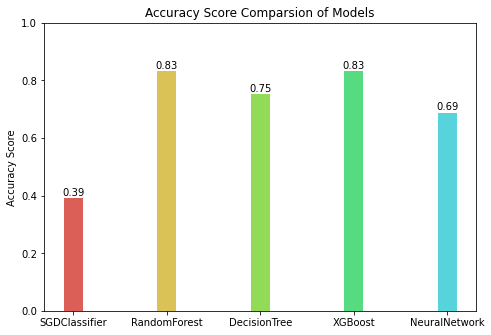

In [100]:
model_labels = ["SGDClassifier", "RandomForest", "DecisionTree", "XGBoost", "NeuralNetwork"]
model_accuracies = [sdg_clf_acc, random_forest_acc, tree_acc, xgboost_acc, ann_acc]



def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.01,y[i], ha="center")
        
import seaborn as sns

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(model_labels, model_accuracies, width=0.2, color=sns.color_palette("hls", 8))
addlabels(model_labels,list(map(lambda x: round(x,2), model_accuracies)))
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score Comparsion of Models")
plt.show()

----------------------------------------------------

## 5. Find Predictions on Real Test Set

In [101]:
predictions = xgboost.predict(test)

In [102]:
test = pd.read_csv("data/test.csv")

In [103]:
submission = pd.DataFrame(test.PassengerId)
submission["Survived"] = predictions
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [104]:
submission.to_csv(r'submisson.csv', index = False)

----------------------------------------------------

# **END**